<a href="https://colab.research.google.com/github/spandanag333/ML_Projects/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we will basically segment customers of a mall. This is a kind of unsupervised Machine Learning model since we are only given the data of the customers and don’t have any kind of label.

So the first thing will be to fetch the dataset.

Go to this website https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Download the csv file and upload in our Project. Since this data is not zipped you need to unzip it. You can start working with the data directly.


In [34]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")        #.read_csv will read the csv file from the path
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


“CustomerID” is again an irrelevant column.
If you want to know more about the data. You can visit the Kaggle site for that.

Now you have 200 data points and 5 features. Now out of these none are target features as such because here we don’t have to predict or classify anything. We just need to understand the customer behaviour and segment them.

So let’s check out the shape


In [35]:
df.shape

(200, 5)

There are 200 rows & 5 columns. This means 200 data points in the data and 5 features.

In [36]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

Now there are no NaN values here. So that is something good.
All the features are integer except the feature 'Gender'.

Now let’s visualize the data


**Data Visualization**

In [37]:
df.groupby('Gender').count()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,112,112,112,112
Male,88,88,88,88


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


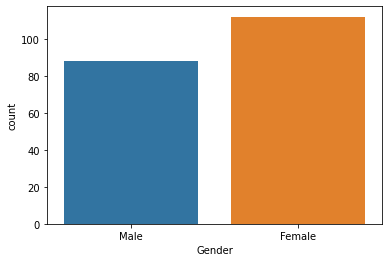

In [38]:
import seaborn as sns
sns.countplot('Gender',data=df)


So this gives the count of males and females.So we see that the mall attracts more female customers as compared to males.

Now we want to see how many people are coming from different ages. For that we use
sns.countplot('Gender',data=df)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


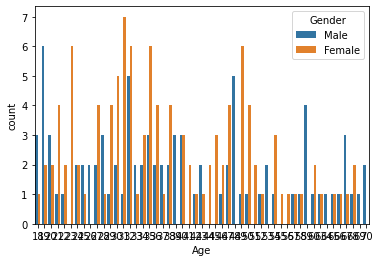

In [39]:
sns.countplot('Age',hue='Gender',data=df)

Now here the values are not clear. So let’s increase the size of the figure and the visualize it again


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


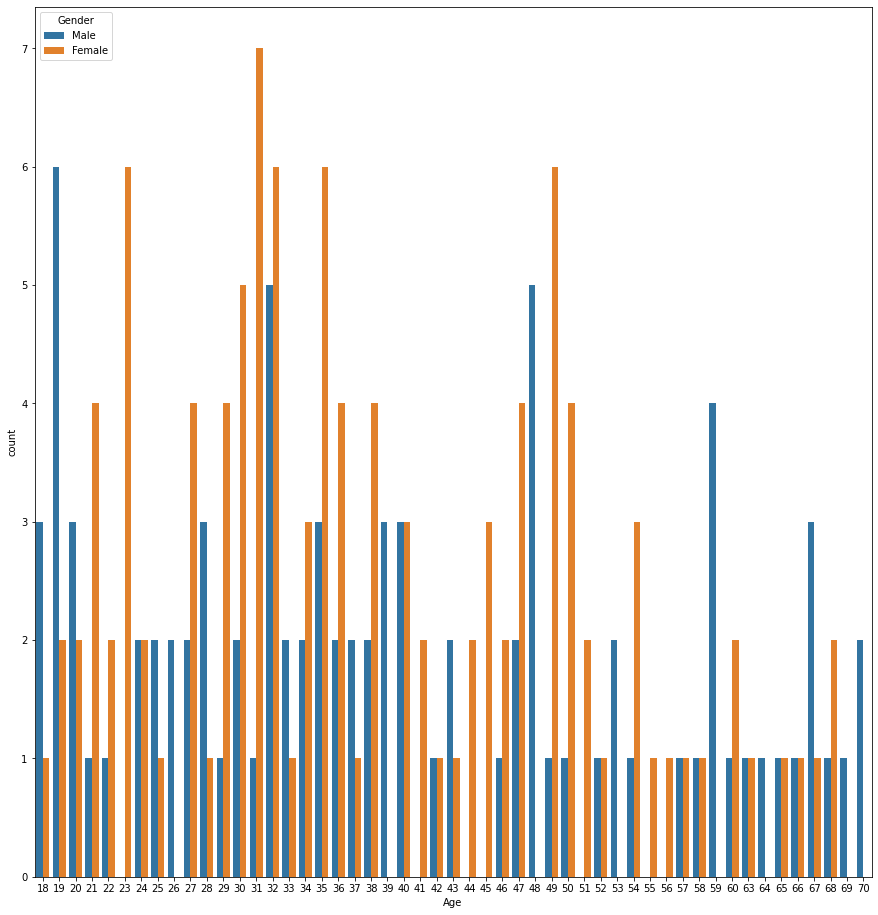

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,16))
sns.countplot('Age',hue='Gender',data=df)

So we can make two important observations from here

There are two age ranges who comes the most to the mall. 1st age range is 27-38 and the second age range is 47-50.
For the age group 18,19,20 the number of males is more than the number of females.
Now let’s have a similar kind of observation for Annual Income


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


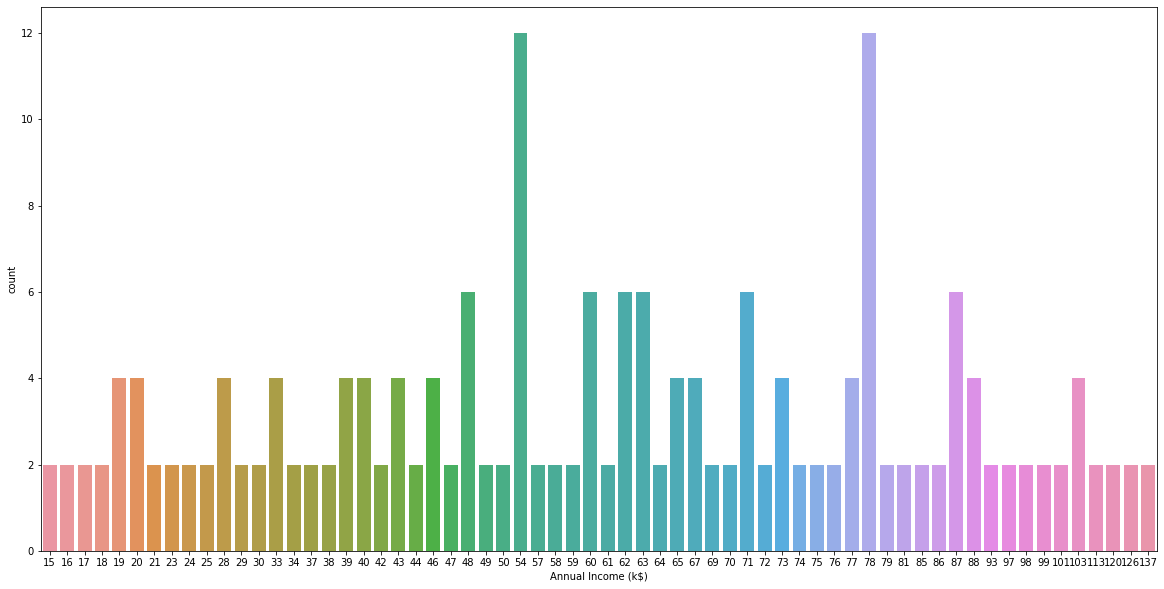

In [41]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot('Annual Income (k$)',data=df)


So you can see that a lot of people are coming from the 54k  and 78k group.
Then for 48k , 62k , 63k  etc we see that a medium number of people are coming and a lesser number of people are coming from 15,16 k  and others. 

Now let’s find the relationship between different features. This can be done using a pair plot. It plots the pairwise relations between features.


<Figure size 1080x432 with 0 Axes>

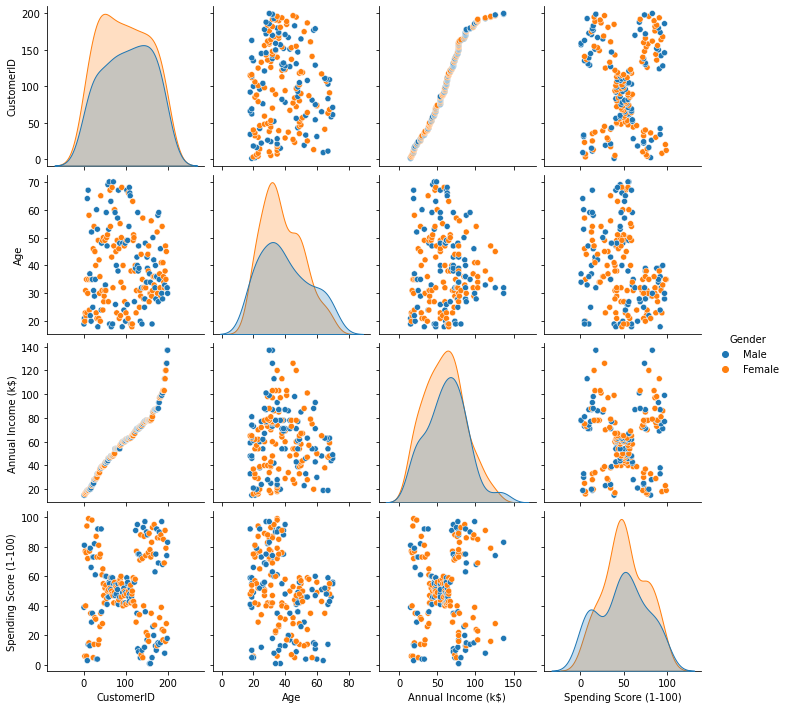

In [42]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.pairplot(df, hue='Gender')


So few very important observations that we can make are :-

Here we see that the feature 'Gender' is not much of a differentiating factor here. Look at the Annual Income for instance. It’s not that males have more annual income or something. Rather the data is somewhat mixed. So we can easily get rid of it by dropping it.
Secondly, the feature CustomerID is also not going to take me anywhere as that is somewhere abrupt. So we will drop that also.

In [43]:
df = df.drop(['Gender','CustomerID'],axis = 1)
df.head

<bound method NDFrame.head of      Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]>

So now we are left with 3 features.

Now we will build the model. So this is basically a Clustering problem because here we need to find different clusters that our customers are forming and based on what are the characteristics of the clusters, the Mall can come up with superb strategies for attracting different types of customers.

There are different clustering algorithms. Here we will be using KMeans.

Here in KMeans clustering the clusters are formed on the basis of the distance of the points. 

Here n_clusters equals to the number of clusters that should be formed. Now it’s not possible for us to know how many clusters would be ideal. So what we do is that we create a for loop that runs from 1-10 i.e each time we pass 1,2,3 like this upto 10 as the number of clusters. 
Now we create an object of the model using KMeans(n_clusters=i) and now using .fit() we are feeding the data to the model.

Now we found km.inertia_ for each case. 
Now here we have 3 clusters.So inertia is calculated as the summation of the square of the distance of all the individual points from the centroid of the cluster it belongs to.

So using the code I am finding out the inertia in each case and appending it to the blank list.



In [44]:

from sklearn.cluster import KMeans
clusters=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
clusters



[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51120.80202614004,
 44342.3173934174,
 40878.641774891774,
 37324.1538729858]

Now there is a method called the elbow method.
Here we will be plotting a lineplot where along the x axis we will place the number of clusters i.e 1-10 and along y we will plot the corresponding inertia value. So we will get a graph like this.


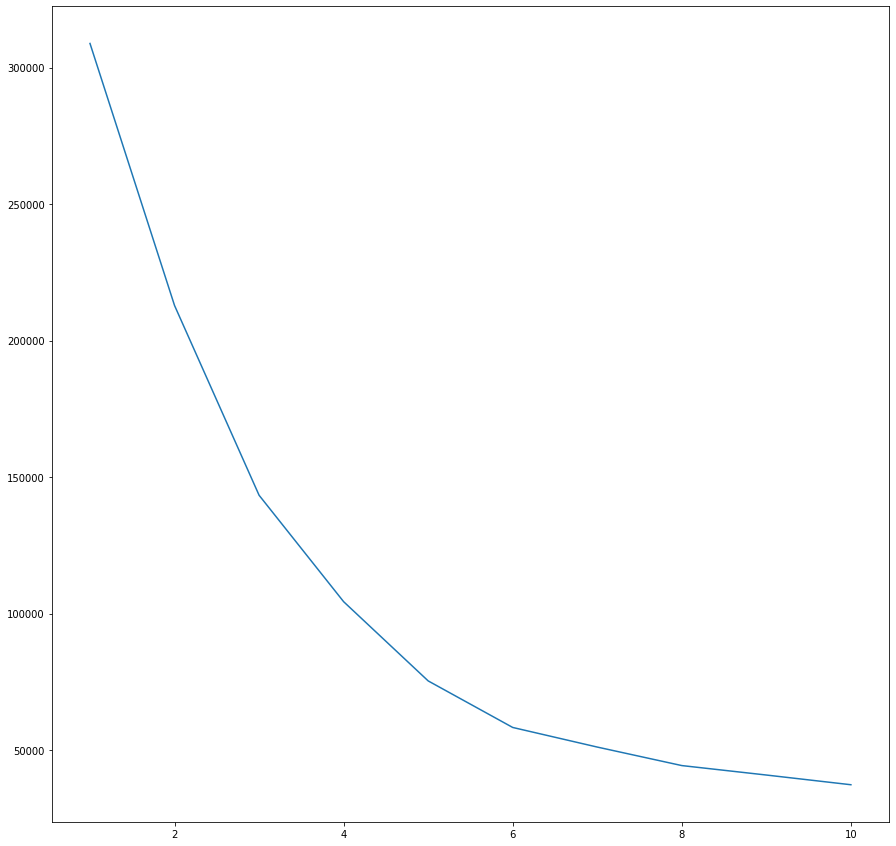

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.plot(list(range(1, 11)), clusters)
 
#sns.lineplot(x=list(range(1, 11)), y=clusters)


So from here we will have to find the elbow. Elbow is like the point of steep change. 
So at 3 and 5 we get elbows.

Since we can see two elbows here at 3 and 5 so the best clusters should be one of them. So we will make 3 clusters and 5 clusters and check which one is giving good insight of the model.
So we will visualize the cluster.

Number of clusters = 3
So here are fitting our model with clusters= 3 and obtaining a scatter plot of the same. Now what does this line
df['Labels'] = km3.labels_
do

It basically creates a new column called Labels where using .labels_ it puts the corresponding value of the label that it has clustered the particular value into. Say for example we have 7 values and the model has clustered the 1st,2nd,6th values together, the 3rd,7th values together and the 4th,5th values together. So it puts the labels as 0,0,1,2,2,0,1. 


Now we use hue=”Labels” , so the dataset will be segregated on the basis of labels.

Now inside .color_palette you mention the palette of color and the number of colors you want. Since we have 3 clusters here we will use 3 i.e 3 different colours for 3 different clusters.

Finally plt.show() displays the graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


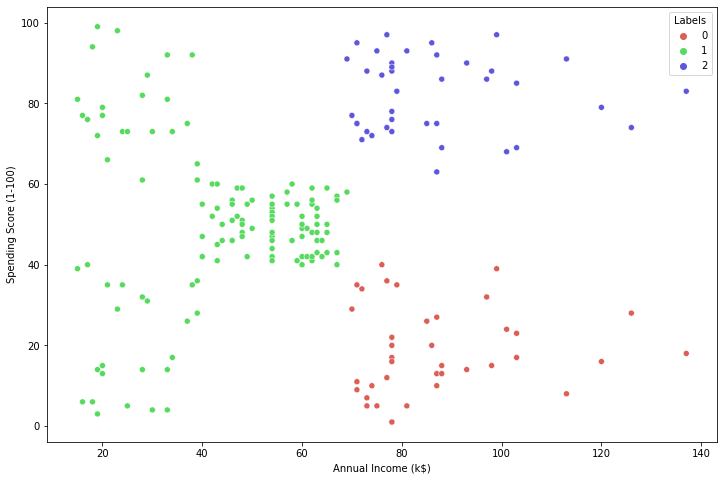

In [46]:
km3 = KMeans(n_clusters=3).fit(df)
 
df['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.show()


Now look at the green cluster. We can clearly see with that within that cluster somewhat 3 different clusters are present. So it’s better to try out with 4 clusters.

Number of clusters =4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


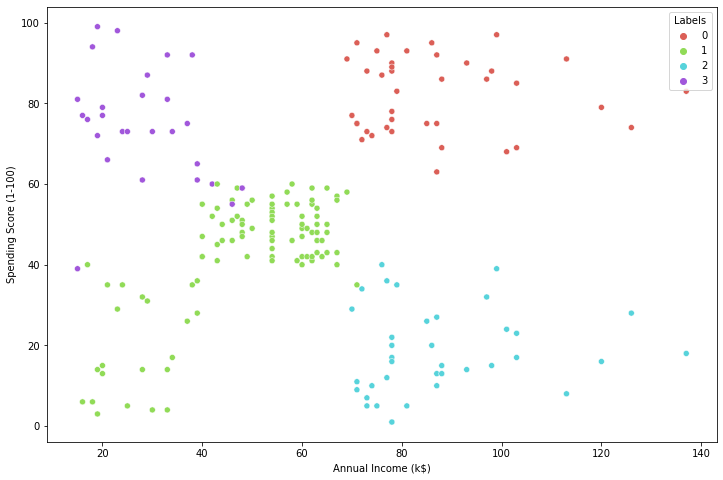

In [47]:
km4 = KMeans(n_clusters=4).fit(df)
 
df['Labels'] = km4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.show()


Now look at the green cluster. We can clearly see with that within that cluster somewhat 2 different clusters are present. So it’s better to try out with 5 clusters.

Number of clusters =5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


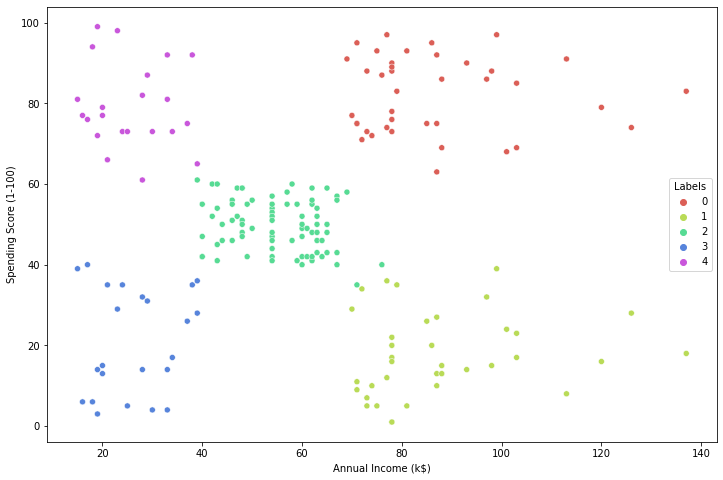

In [48]:
km5 = KMeans(n_clusters=5).fit(df)
 
df['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.show()


So from here you can clearly see that there are 5 different types of customers -

Annual Income low, spending score low ( Label 2)

Annual Income low, spending score high ( Label 4)

Annual Income high, spending score low ( Label 1)

Annual Income high, spending score high ( Label 0)

Annual Income medium, spending score medium ( Label 3)
